<a href="https://colab.research.google.com/github/gabychoi/CODELION/blob/main/datice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 폰트 문제 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,896 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160983 files and d

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# 원 데이터 불러오기
raw_data = pd.read_csv('/content/gdrive/My Drive/data/data_compensation.csv')
raw_data

,구 분,연도,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,전체 건수,"6,672","15,116","39,519","33,760","34,366","14,546","8,713","7,374","5,073","4,257","4,380"
1,NaN,전체 보상금액,"18,361","22,566","53,179","57,672","88,164","52,975","31,769","36,038","36,736","40,138","41,907"
2,NaN,형사보상 건수,"6,649","15,097","39,501","33,745","34,352","14,532","8,690","7,355","5,062","4,232","4,366"
3,NaN,형사보상 금액,"18,317","22,522","53,148","57,641","88,135","52,937","31,681","35,934","36,704","39,812","41,651"
4,NaN,피의자보상 건수,23,19,18,15,14,14,23,19,11,25,14
5,NaN,피의자보상 금액,44,44,31,31,29,38,88,104,32,326,256


In [5]:
# 데이터 카피
copy_data = raw_data
copy_data

,구 분,연도,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,전체 건수,"6,672","15,116","39,519","33,760","34,366","14,546","8,713","7,374","5,073","4,257","4,380"
1,NaN,전체 보상금액,"18,361","22,566","53,179","57,672","88,164","52,975","31,769","36,038","36,736","40,138","41,907"
2,NaN,형사보상 건수,"6,649","15,097","39,501","33,745","34,352","14,532","8,690","7,355","5,062","4,232","4,366"
3,NaN,형사보상 금액,"18,317","22,522","53,148","57,641","88,135","52,937","31,681","35,934","36,704","39,812","41,651"
4,NaN,피의자보상 건수,23,19,18,15,14,14,23,19,11,25,14
5,NaN,피의자보상 금액,44,44,31,31,29,38,88,104,32,326,256


In [6]:
# 재원 버전
aaa = copy_data.iloc[:, 1:].T
col = aaa.iloc[0, :].to_list()

df = aaa.iloc[1:, :]
df.columns = col

df.index.name = '연도'
display(df)

,전체 건수,전체 보상금액,형사보상 건수,형사보상 금액,피의자보상 건수,피의자보상 금액
연도,,,,,,
2010,"6,672","18,361","6,649","18,317",23,44
2011,"15,116","22,566","15,097","22,522",19,44
2012,"39,519","53,179","39,501","53,148",18,31
2013,"33,760","57,672","33,745","57,641",15,31
2014,"34,366","88,164","34,352","88,135",14,29
2015,"14,546","52,975","14,532","52,937",14,38
2016,"8,713","31,769","8,690","31,681",23,88
2017,"7,374","36,038","7,355","35,934",19,104
2018,"5,073","36,736","5,062","36,704",11,32


In [7]:
# 연도별 보상금 데이터프레임 생성
data = {
    "전체 건수" : [6672,	15116,	39519,	33760,	34366,	14546,	8713,	7374,	5073,	4257,	4380],
    "전체 보상금액" : [18361,	22566,	53179,	57672,	88164,	52975,	31769,	36038,	36736,	40138,	41907],
    "형사보상 건수" : [6649,	15097,	39501,	33745,	34352,	14532,	8690,	7355,	5062,	4232,	4366],
    "형사보상 금액" : [18317,	22522,	53148,	57641,	88135,	52937,	31681,	35934,	36704,	39812,	41651],
    "피의자보상 건수" : [23,	19,	18,	15,	14,	14,	23,	19,	11,	25,	14],
    "피의자보상 금액" : [44,	44,	31,	31,	29,	38,	88,	104,	32,	326,	256],
}
columns = ["전체 건수", "전체 보상금액", "형사보상 건수", "형사보상 금액", "피의자보상 건수", "피의자보상 금액"]
compen_df = pd.DataFrame(data, index=['2010',	'2011',	'2012',	'2013',	'2014',	'2015',	'2016',	'2017',	'2018',	'2019',	'2020'] , columns=columns)
compen_df.index.name = '연도'
display(compen_df)

,전체 건수,전체 보상금액,형사보상 건수,형사보상 금액,피의자보상 건수,피의자보상 금액
연도,,,,,,
2010,6672,18361,6649,18317,23,44
2011,15116,22566,15097,22522,19,44
2012,39519,53179,39501,53148,18,31
2013,33760,57672,33745,57641,15,31
2014,34366,88164,34352,88135,14,29
2015,14546,52975,14532,52937,14,38
2016,8713,31769,8690,31681,23,88
2017,7374,36038,7355,35934,19,104
2018,5073,36736,5062,36704,11,32


In [8]:
# 시각화 준비
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# 폰트 지정
plt.rc('font', family='NanumBarunGothic') 

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


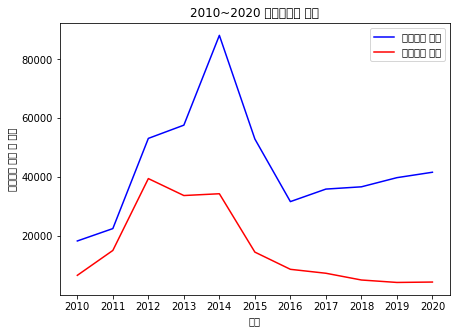

In [9]:
# 라인 그래프 생성
fig , axes = plt.subplots(figsize=(7,5))
plt.title('2010~2020 형사보상금 현황')
plt.plot(compen_df["형사보상 금액"],  c = 'b')
plt.plot(compen_df["형사보상 건수"],  c = 'r')
plt.xlabel('연도')
plt.ylabel('형사보상 금액 및 건수')
plt.legend(['형사보상 금액', '형사보상 건수'])
plt.show()

In [10]:
# 재심 관련 기간 데이터 불러오기
retrial_data = pd.read_csv('/content/gdrive/My Drive/data/retrial_data.csv')
retrial_data

,연도,재심청구사건 결정 접수건,재심청구사건 결정평균일수,재심청구사건 최장처리일수,재심청구사건 최단처리일수,즉시항고 결정 접수건,즉시항고 결정 처리건수,즉시항고 결정평균일수,즉시항고 최장처리일수,즉시항고 최단처리일수,재항고 결정 접수건수,재항고 결정 처리건수,재항고 결정평균일수,재항고 최장처리일수,재항고 최단처리일수
0,2002,242,160.6,1380,2.0,39,45,208.3,1989,11.0,57,44,74.5,84,65
1,2003,287,168.7,2144,5.0,68,63,323.4,1396,NaN,64,50,128.0,173,83
2,2004,257,194.2,2567,1.0,66,74,246.3,1055,3.0,77,83,116.0,238,62
3,2005,255,164.0,1697,NaN,83,78,244.9,1757,4.0,105,94,115.0,502,17
4,2006,285,149.8,1574,1.0,85,74,212.4,2287,2.0,130,128,94.8,465,28
5,2007,292,181.2,1505,3.0,88,84,232.4,1316,1.0,96,90,106.0,560,15
6,2008,339,146.1,1051,2.0,99,107,190.9,2416,5.0,130,147,213.3,572,40
7,2009,780,102.2,1611,NaN,127,114,177.7,3317,1.0,133,126,75.3,278,21
8,2010,774,112.5,2219,1.0,148,133,218.6,1629,2.0,133,145,104.9,513,17
9,2011,1313,121.7,1028,NaN,136,145,201.9,1272,1.0,155,146,89.2,884,21
